This notebook does three things.
1. Test the trained models on the real data. 
2. Identify which test sampels I fail on
3. Compare the loss and accuracy during the training and testing on simulations.

In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
from globalVariables import *

In [4]:
testData = np.load("../data/nntest.npy")
truth = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]

This is testing the number of nodes in the final layer on the real data sets.

In [20]:
for i in [32,64,128,256,512, 1024]:
    simpleModel = tf.keras.models.load_model('pickles/simpleCNN_fl_%i.h5' %i)
    simpleModel.evaluate(testData, np.array(truth))

1/1 [==============================] - 0s 161ms/step - loss: 0.5029 - accuracy: 0.9000


This tests whether the double data is needed for the training (20k over 10k).
It also iterates through each monte carlo so you can see the variance in the real data set due to the training data.

In [ ]:
for i in range(1,4):
    simpleModel = tf.keras.models.load_model('pickles/simple_doubleData_%i.h5' %i)
    predictionSimple = np.argmax(simpleModel.predict(testData),axis=1)
    simpleModel.evaluate(testData, np.array(truth))
    
for i in range(1,10):
    simpleModel = tf.keras.models.load_model('pickles/simple_%i.h5' %i)
    predictionSimple = np.argmax(simpleModel.predict(testData),axis=1)
    simpleModel.evaluate(testData, np.array(truth))

1/1 [==============================] - 0s 331ms/step - loss: 0.3664 - accuracy: 0.9333


Now for a given model see which samples it fails on.

1/1 [==============================] - 1s 1s/step


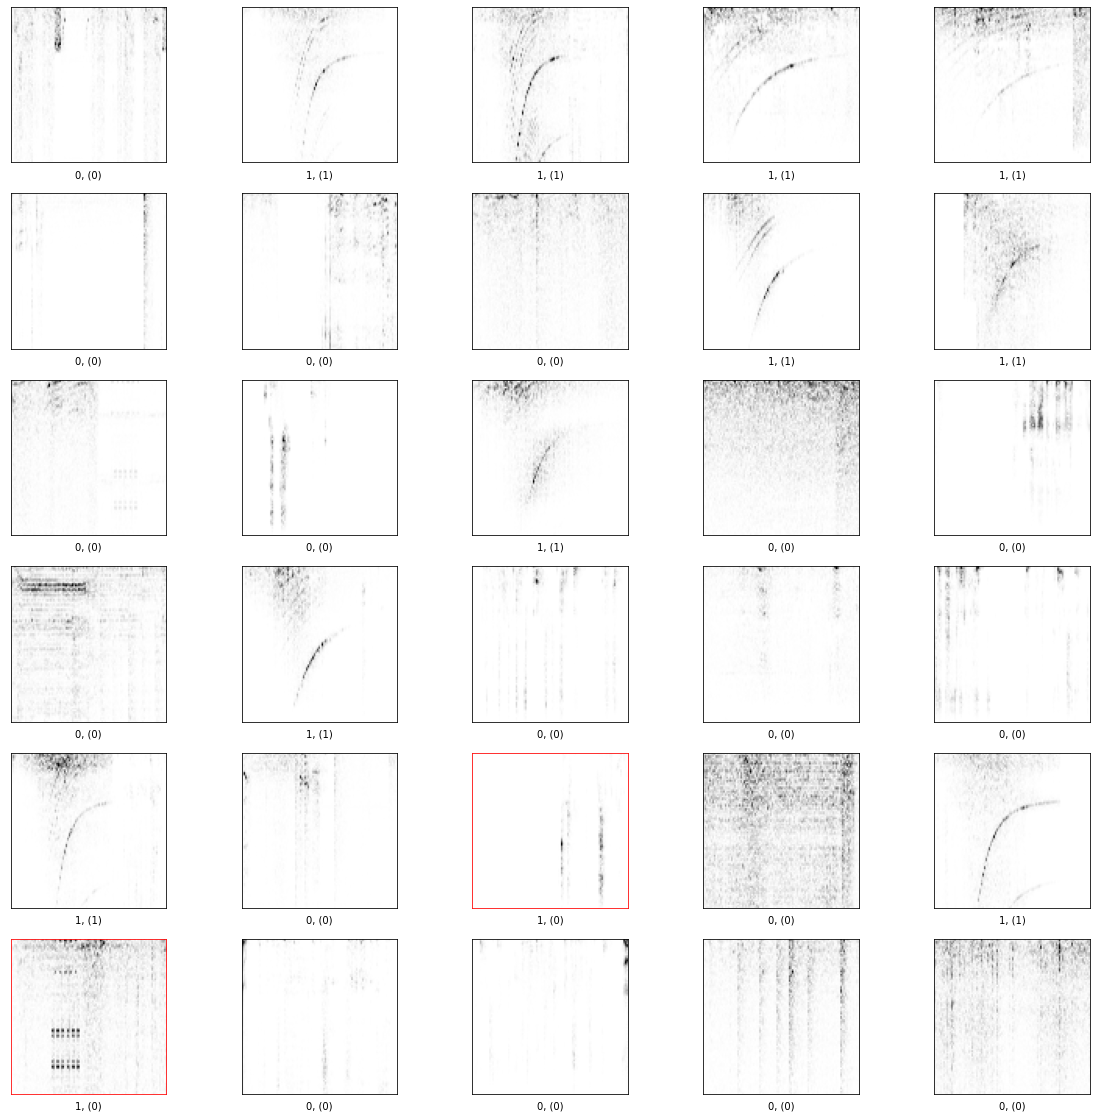

In [5]:
simpleModel = tf.keras.models.load_model('pickles/simple_1.h5')
predictionSimple = np.argmax(simpleModel.predict(testData),axis=1)

plt.figure(figsize=(20,20))
for j in range(30):
    plt.subplot(6,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testData[j], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.xlabel("%i, (%i)" %(predictionSimple[j], truth[j]))
    if predictionSimple[j] != truth[j]:
        ax = plt.gca()
        ax.spines['bottom'].set_color('red')
        ax.spines['top'].set_color('red') 
        ax.spines['right'].set_color('red')
        ax.spines['left'].set_color('red')

plt.show()



This looks at the loss and accuracy over the monte-carloed models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


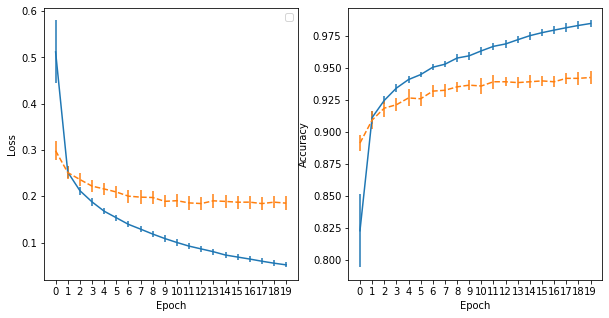

In [36]:
fig, [ax1, ax2]  = plt.subplots( 1, 2, figsize=(10,5))

color=['r','g','b','c','y','orange','k','grey','purple']


trainHistory = None

for i in range(1,10):
    csv_file = 'pickles/simple_%i.csv' % i


    
    iTrainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
    if trainHistory is None:
         trainHistory = iTrainHistory
    else:
        trainHistory = np.vstack( ( iTrainHistory, trainHistory))
    
    

    
ax1.errorbar(trainHistory['epoch'][0], np.median(trainHistory['loss'], axis=0), yerr=np.std(trainHistory['loss'], axis=0), ls='-')
ax1.errorbar(trainHistory['epoch'][0], np.median(trainHistory['val_loss'], axis=0), yerr=np.std(trainHistory['val_loss'], axis=0), ls='--')
ax2.errorbar(trainHistory['epoch'][0], np.median(trainHistory['accuracy'], axis=0), yerr=np.std(trainHistory['accuracy'], axis=0), ls='-')
ax2.errorbar(trainHistory['epoch'][0], np.median(trainHistory['val_accuracy'], axis=0), yerr=np.std(trainHistory['val_accuracy'], axis=0), ls='--')

    
ax2.set_ylabel("Accuracy")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epoch")
ax2.set_xlabel("Epoch")
ax1.legend()